In [1]:
from fit_param import test
import matplotlib.pyplot as plt
import numpy as np
import os
from average_dTb import average_dTb, dTb_random_v_stream

In [2]:
# param_fits = test([0.5, 29000], cores=-1, repeat=100, plot=False, average_dir = '.', delete_if_exists=False)
# np.savetxt("param_fits.txt", param_fits)
# test([0.15, 33000], cores=-1, repeat=100, plot=False, average_dir = '.', delete_if_exists=False)

In [3]:
for m_chi in np.logspace(-2, 0, 3):
    for V_rms in np.linspace(20000, 40000, 3):
        param_fits = test([m_chi, V_rms], cores=1, repeat=20, plot=False, average_dir = 'average_dTb', delete_if_exists=False)

param_true = [0.01, 20000.0]
2 random v_streams will be generated for m_chi = 0.01 GeV and V_rms = 20000.0 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.1 GeV and V_rms = 29000.0 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.1 GeV and V_rms = 29000.0 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.1 GeV and V_rms = 58000.0 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05261289891614487 GeV and V_rms = 28999.545470267458 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.052612898916145 GeV and V_rms = 28999.545470267458 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05261289891614487 GeV and V_rms = 57999.090940534916 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00137318159756597 GeV and 

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0577651254267296 GeV and V_rms = 28997.612351974476 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.057769004417575986 GeV and V_rms = 28997.38624473767 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.057752675993450166 GeV and V_rms = 28997.322839659624 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.022108831651620926 GeV a

---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0081756040915368 GeV and V_rms = 28997.30975616039 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.008175604091536738 GeV and V_rms = 57994.61951232078 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.008069789764709222 GeV and V_rms = 28997.303199034184 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00814915023224455 GeV and V_rms = 28997.308132844526 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 differ

Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009785873423378957 GeV and V_rms = 2864.786899975621 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.003774922034219891 GeV and V_rms = 22466.39092374155 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0022924399996986783 GeV and V_rms = 27367

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.03542722555641882 GeV and V_rms = 28999.30235943518 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0354272255564188 GeV and V_rms = 28999.30235943518 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.03542722555641882 GeV and V_rms = 57998.60471887036 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00730340031363956 GeV and V_

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.022108702961351413 GeV and V_rms = 28997.312975244862 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.011004618702574243 GeV and V_rms = 28997.312975225657 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00822859763787978 GeV and V_rms = 28997.312975220866 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0082285976378798 GeV and V_rms = 28997.312975220866 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 diff

2 random v_streams will be generated for m_chi = 0.008149285931636222 GeV and V_rms = 28997.30817518128 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.008169126429190127 GeV and V_rms = 28997.30939364006 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.00816912642919 GeV and V_rms = 28997.30939364006 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.008169126429190127 GeV and V_rms = 57994.61878728012 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
--------------

2 random v_streams will be generated for m_chi = 0.0020035793385705936 GeV and V_rms = 28595.05926421777 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.002330301741678753 GeV and V_rms = 28912.500257341293 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05261284575246024 GeV and V_rms = 28999.545469040728 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0526128457524602 GeV and V_rms = 28999.545469040728 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------

2 random v_streams will be generated for m_chi = 0.007303301143212659 GeV and V_rms = 28997.31298851292 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0073033011432126 GeV and V_rms = 28997.31298851292 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.007303301143212659 GeV and V_rms = 57994.62597702584 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05778907512107352 GeV and V_rms = 28997.612313159083 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------

2 random v_streams will be generated for m_chi = 0.008228607627979345 GeV and V_rms = 57994.62595496967 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.008175528615301176 GeV and V_rms = 28997.30973087148 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0081755286153011 GeV and V_rms = 28997.30973087148 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.008175528615301176 GeV and V_rms = 57994.61946174296 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------

2 random v_streams will be generated for m_chi = 0.008167388502505113 GeV and V_rms = 28997.309266237284 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#14 , fit: [8.16904121e-03 2.89973094e+04] , success: True , status: 3 , cost 0.01 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0097858448494276 GeV and V_rms = 2864.7745735684402 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 d

2 random v_streams will be generated for m_chi = 0.001373172884906619 GeV and V_rms = 28965.50909511464 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.035427126768893036 GeV and V_rms = 28999.302357728015 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.035427126768893 GeV and V_rms = 28999.302357728015 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.035427126768893036 GeV and V_rms = 57998.60471545603 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------

2 random v_streams will be generated for m_chi = 0.02210875674162526 GeV and V_rms = 28997.31299690772 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.011004685448360692 GeV and V_rms = 28997.312996888515 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00822866762504438 GeV and V_rms = 28997.312996883724 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0082286676250445 GeV and V_rms = 28997.312996883724 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------

2 random v_streams will be generated for m_chi = 0.008169068835004284 GeV and V_rms = 28997.309375899295 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0081690688350042 GeV and V_rms = 28997.309375899295 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.008169068835004284 GeV and V_rms = 57994.61875179859 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00816245800839453 GeV and V_rms = 28997.30897089342 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------

2 random v_streams will be generated for m_chi = 0.002330344066079071 GeV and V_rms = 28912.500526257943 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05261295814853 GeV and V_rms = 28999.545471198606 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.05261295814853 GeV and V_rms = 28999.545471198606 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05261295814853 GeV and V_rms = 57999.09094239721 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-------------------

2 random v_streams will be generated for m_chi = 0.0034836119591195452 GeV and V_rms = 28919.382904010297 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05547678124580263 GeV and V_rms = 28999.594177983934 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0554767812458026 GeV and V_rms = 28999.594177983934 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05547678124580263 GeV and V_rms = 57999.18835596787 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0037594898565500206 GeV and V_rms = 28996.93736933341 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009305190005611032 GeV and V_rms = 28997.995301506744 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.010699207575871762 GeV and V_rms = 28998.073815420743 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0106992075758718 GeV and V_rms = 28998.073815420743 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 dif

2 random v_streams will be generated for m_chi = 0.013267034292589196 GeV and V_rms = 28998.027355906786 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.010659168576902684 GeV and V_rms = 28998.027355902283 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.010007202147981049 GeV and V_rms = 28998.02735590116 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0100072021479811 GeV and V_rms = 28998.02735590116 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------

2 random v_streams will be generated for m_chi = 1.0554765266026604 GeV and V_rms = 28999.59417375544 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05547652660266039 GeV and V_rms = 57999.18834751088 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.002059528859526198 GeV and V_rms = 28971.158674828544 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.038895674047798125 GeV and V_rms = 28999.380435943873 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.010699211491083993 GeV and V_rms = 28998.073818048386 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.010699211491084 GeV and V_rms = 28998.073818048386 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.010699211491083993 GeV and V_rms = 57996.14763609677 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009789304311178417 GeV an

2 random v_streams will be generated for m_chi = 1.010006818793039 GeV and V_rms = 28998.027294442938 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01000681879303901 GeV and V_rms = 57996.054588885876 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#7 , fit: [1.00068188e-02 2.89980273e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_ch

2 random v_streams will be generated for m_chi = 0.038896016479436746 GeV and V_rms = 28999.380443145164 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0388960164794367 GeV and V_rms = 28999.380443145164 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.038896016479436746 GeV and V_rms = 57998.76088629033 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.011164299659362581 GeV and V_rms = 28998.095586709027 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------

2 random v_streams will be generated for m_chi = 0.009789556118493428 GeV and V_rms = 28998.027303917646 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0097895561184935 GeV and V_rms = 28998.027303917646 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009789556118493428 GeV and V_rms = 57996.05460783529 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0654243269444193 GeV and V_rms = 28998.027304024385 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0036723374669034997 GeV and V_rms = 27466.150785558166 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0031854323853940936 GeV and V_rms = 28619.8772133164 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0034834728031068046 GeV and V_rms = 28919.382120934995 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.055476456968752134 G

2 random v_streams will be generated for m_chi = 1.0111641222038092 GeV and V_rms = 28998.09556242998 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.011164122203809152 GeV and V_rms = 57996.19112485996 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0012361587165268494 GeV and V_rms = 28952.88504360239 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0037596088261225456 GeV and V_rms = 28996.937458533946 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------

2 random v_streams will be generated for m_chi = 0.023698065213118888 GeV and V_rms = 28998.02726701104 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.013266503802991004 GeV and V_rms = 28998.02726699299 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01065861345045889 GeV and V_rms = 28998.027266988487 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.010006640862325854 GeV and V_rms = 28998.027266987363 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------

2 random v_streams will be generated for m_chi = 0.0554767605350613 GeV and V_rms = 28999.594176212388 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0554767605350612 GeV and V_rms = 28999.594176212388 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0554767605350613 GeV and V_rms = 57999.188352424775 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.002059571882933979 GeV and V_rms = 28971.159179186114 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------

It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01069968446586195 GeV and V_rms = 28998.073886743343 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.010699684465862 GeV and V_rms = 28998.073886743343 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01069968446586195 GeV and V_rms = 57996.147773486686 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009789764145742164 GeV and V_rms = 28998.02

2 random v_streams will be generated for m_chi = 0.010007020465980865 GeV and V_rms = 57996.054652845596 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#18 , fit: [1.00070205e-02 2.89980273e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01516720017202812 GeV and V_rms = 4444.531984348214 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 d

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.03889570057309232 GeV and V_rms = 57998.76087456136 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.011163937731938356 GeV and V_rms = 28998.095536643457 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0111639377319384 GeV and V_rms = 28998.095536643457 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.011163937731938356 GeV and V_rms = 57996.191073286915 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 diffe

It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009755900319575284 GeV and V_rms = 28998.277066544913 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01261752286218774 GeV and V_rms = 28998.445645805106 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0126175228621876 GeV and V_rms = 28998.445645805106 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01261752286218774 GeV and V_rms = 57996.8

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0048568437252565905 GeV and V_rms = 28926.84981694225 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05854469292151927 GeV and V_rms = 28999.641530594658 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0585446929215192 GeV and V_rms = 28999.641530594658 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05854469292151927 GeV and V_rms = 57999.283061189315 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 diffe

---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0135706309827428 GeV and V_rms = 28998.483411433874 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01357063098274282 GeV and V_rms = 57996.96682286775 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009754823513027156 GeV and V_rms = 28998.276911313686 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.012616377209671731 GeV and V_rms = 28998.445541852554 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 diffe

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.004582456081657513 GeV and V_rms = 28646.475363935337 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.004856660480435718 GeV and V_rms = 28926.848824309218 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05854428934042563 GeV and V_rms = 28999.641524051727 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0585442893404255 GeV a

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.015619329777708045 GeV and V_rms = 57997.11811433046 m/s...
1 CPU working...
It costs 0.01 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0013876565281361261 GeV and V_rms = 28958.33617266373 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.007437467472235292 GeV and V_rms = 28997.98053103341 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.013571862270848913 GeV and V_rms = 28998.483519870348 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 dif

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.025565275220848838 GeV and V_rms = 28998.44558567998 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.015853977066240595 GeV and V_rms = 28998.445585663165 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.013426152527588388 GeV and V_rms = 28998.445585658967 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.01281919639292533 GeV and V_rms = 28998.44558565792 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 diff

2 random v_streams will be generated for m_chi = 0.0030771037828199385 GeV and V_rms = 28977.96242011634 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.042685387892728896 GeV and V_rms = 28999.455216336082 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.042685387892729 GeV and V_rms = 28999.455216336082 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.042685387892728896 GeV and V_rms = 57998.910432672164 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------

2 random v_streams will be generated for m_chi = 0.013571042672557163 GeV and V_rms = 28998.48344731998 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0135710426725573 GeV and V_rms = 28998.48344731998 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.013571042672557163 GeV and V_rms = 57996.96689463996 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.009755203120977836 GeV and V_rms = 28998.276960679505 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------

2 random v_streams will be generated for m_chi = 0.008386107577661214 GeV and V_rms = 23284.37251093758 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00527463635075906 GeV and V_rms = 27571.950688795798 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.004582404928814704 GeV and V_rms = 28646.474716809655 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0048566091108043635 GeV and V_rms = 28926.848647011673 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-------

2 random v_streams will be generated for m_chi = 0.0013878729036650023 GeV and V_rms = 28958.33515717298 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.007436855393959335 GeV and V_rms = 28997.98042028218 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.013571179485429564 GeV and V_rms = 28998.483458363542 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0135711794854296 GeV and V_rms = 28998.483458363542 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------

---------------------------------------------
#15 , fit: [1.26166375e-02 2.89984456e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.020916125925482434 GeV and V_rms = 6136.5495653617 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.00838592288454805 GeV and V_rms = 23284.340395967138 m/s...
1 CPU working...
I

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.015619418624263 GeV and V_rms = 28998.559062203723 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.015619418624263161 GeV and V_rms = 57997.11812440745 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0013876026050036495 GeV and V_rms = 28958.336315648976 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.007437544491200503 GeV a

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.025565913386758534 GeV and V_rms = 28998.44566496734 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.015854750291650857 GeV and V_rms = 28998.445664950526 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.013426959517873791 GeV and V_rms = 28998.445664946328 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.012820011824429517 GeV

It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.04268538160106593 GeV and V_rms = 28999.455214199632 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.042685381601066 GeV and V_rms = 28999.455214199632 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.04268538160106593 GeV and V_rms = 57998.910428399264 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.015619384514410164 GeV and V_rms = 28998.55

---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0774421582685643 GeV and V_rms = 28999.85038849938 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07744215826856417 GeV and V_rms = 57999.70077699876 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05619746452036495 GeV and V_rms = 28979.323648879963 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.06751688744914203 GeV and V_rms = 28999.76117718016 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different

2 random v_streams will be generated for m_chi = 0.07727968953464213 GeV and V_rms = 28999.849234719928 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07739603850032445 GeV and V_rms = 28999.85005236014 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#4 , fit: [7.74348215e-02 2.89998503e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_c

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0772841377167733 GeV and V_rms = 28999.849274493634 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07740046720250854 GeV and V_rms = 28999.85009191222 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#7 , fit: [7.74392437e-02 2.89998504e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z a

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07728242608626837 GeV and V_rms = 28999.84925773717 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07739876306736769 GeV and V_rms = 28999.850075279464 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#10 , fit: [7.74375421e-02 2.89998503e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z

2 random v_streams will be generated for m_chi = 0.07681236124230312 GeV and V_rms = 28999.845915550522 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07727778980658635 GeV and V_rms = 28999.84921702852 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07739414709033969 GeV and V_rms = 28999.850034820654 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#13 , fit: [7.74329329e-02 2.89998503e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_c

2 random v_streams will be generated for m_chi = 0.0768164402356811 GeV and V_rms = 28999.845954096563 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07728179858660482 GeV and V_rms = 28999.849254374134 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07739813831686522 GeV and V_rms = 28999.85007187309 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#16 , fit: [7.74369182e-02 2.89998503e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_ch

2 random v_streams will be generated for m_chi = 0.07681770663031572 GeV and V_rms = 28999.84596568752 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07728304318049656 GeV and V_rms = 28999.84926564743 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07739937746053514 GeV and V_rms = 28999.850083068643 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#19 , fit: [7.74381556e-02 2.89998504e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_ch

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07788743577819325 GeV and V_rms = 30845.329550854985 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0770099359625514 GeV and V_rms = 30917.46754204149 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.08954317906217027 GeV and V_rms = 30936.60475254285 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09730494928876016 GeV and V_rms = 30936.653590316877 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 differen

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09729073996867148 GeV and V_rms = 61889.19991169148 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10120433289008249 GeV and V_rms = 30944.58406198725 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10120413563799324 GeV and V_rms = 30944.596169214627 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10042627627655937 GeV and 

2 random v_streams will be generated for m_chi = 0.10036312378664002 GeV and V_rms = 30950.076133922816 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09805169384653381 GeV and V_rms = 30950.076133920786 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.098051693846534 GeV and V_rms = 30950.076133920786 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09805169384653381 GeV and V_rms = 61900.15226784157 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-------------

2 random v_streams will be generated for m_chi = 0.09735087921430638 GeV and V_rms = 61829.901411049505 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.1013595375324969 GeV and V_rms = 30914.93245837359 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10135931263649507 GeV and V_rms = 30914.9463136255 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10094842655110223 GeV and V_rms = 30914.9507055263 m/s...
1 CPU working...
It costs 0.02 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------

2 random v_streams will be generated for m_chi = 0.13348176033191433 GeV and V_rms = 29000.461835914237 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.13348776654984726 GeV and V_rms = 29000.114998161374 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.13348929771779622 GeV and V_rms = 29000.02683895751 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.12271122588527468 GeV and V_rms = 29000.00000004048 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09505810142866966 GeV and V_rms = 29383.85821296574 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.08069666856511709 GeV and V_rms = 30544.230074767598 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07710342795616928 GeV and V_rms = 30834.981355393364 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.07619531107084011 GeV and

2 random v_streams will be generated for m_chi = 0.09808358490025416 GeV and V_rms = 31011.13576457288 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0980835849002542 GeV and V_rms = 31011.13576457288 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09808358490025416 GeV and V_rms = 62022.27152914576 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0977072910386615 GeV and V_rms = 31011.133765504685 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------

2 random v_streams will be generated for m_chi = 0.09792977432541618 GeV and V_rms = 30975.756450628603 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0982841461318547 GeV and V_rms = 30975.758313181006 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0982841461318547 GeV and V_rms = 30975.758313181006 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0982841461318547 GeV and V_rms = 61951.51662636201 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
--------------

2 random v_streams will be generated for m_chi = 0.09828101849961915 GeV and V_rms = 61949.25807691829 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0977575641365629 GeV and V_rms = 30974.626272954636 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09815015484893409 GeV and V_rms = 30974.628350666844 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.098150154848934 GeV and V_rms = 30974.628350666844 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
--------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.1014143650944799 GeV and V_rms = 29000.000000002492 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10141436509447992 GeV and V_rms = 58000.000000004984 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10424289321272408 GeV and V_rms = 29000.00000000754 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.102121497124041 GeV and V_

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0972798974253584 GeV and V_rms = 30950.84320981508 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09727989742535838 GeV and V_rms = 61901.68641963016 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10118469685432652 GeV and V_rms = 30950.82762225726 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.10118450323239947 GeV and V_

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0887890882270961 GeV and V_rms = 44940.67916192864 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.088789088227096 GeV and V_rms = 44940.67916192864 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0887890882270961 GeV and V_rms = 89881.35832385728 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.12603148614010906 GeV and V_rms

2 random v_streams will be generated for m_chi = 0.05542278592036787 GeV and V_rms = 44956.7871556636 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.08878284016497459 GeV and V_rms = 44957.46344017781 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0887828401649746 GeV and V_rms = 44957.46344017781 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.08878284016497459 GeV and V_rms = 89914.92688035562 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------

2 random v_streams will be generated for m_chi = 0.044936505155681976 GeV and V_rms = 44831.87101005519 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.05486428679237691 GeV and V_rms = 44946.61361770811 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.08878751907087692 GeV and V_rms = 44947.32309431797 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.088787519070877 GeV and V_rms = 44947.32309431797 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------

2 random v_streams will be generated for m_chi = 1.092226601032162 GeV and V_rms = 44957.408030543535 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09222660103216188 GeV and V_rms = 89914.81606108707 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09156198793824082 GeV and V_rms = 44957.404099087435 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09206044765809171 GeV and V_rms = 44957.40705600401 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
--------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09229534385079759 GeV and V_rms = 89892.08096880613 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0916181929323795 GeV and V_rms = 44946.03649543284 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09212605602097518 GeV and V_rms = 44946.03949548001 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09225302188744397 GeV and V_

It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09159463067243633 GeV and V_rms = 44952.03875578862 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09209858326387786 GeV and V_rms = 44952.04173782924 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09222457150616503 GeV and V_rms = 44952.04247551278 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#12 , fit: [9.22665676e-02 4.49520427e+04] , success: True , status: 3 , cost 0.00 min
--------

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09215838372970918 GeV and V_rms = 44964.6486655044 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#14 , fit: [9.21996095e-02 4.49646489e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09966369164415474 GeV and V_rms = 44968.43744387356 m/s...
1 CPU working...
It

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0922804981408331 GeV and V_rms = 44949.131420744576 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0922804981408332 GeV and V_rms = 44949.131420744576 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0922804981408331 GeV and V_rms = 89898.26284148915 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09160603052241179 GeV and V_rms = 44949.12744390551 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different 

2 random v_streams will be generated for m_chi = 0.09224734423286313 GeV and V_rms = 89898.88926853843 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.09157891151466184 GeV and V_rms = 44949.44068559612 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0920802359529296 GeV and V_rms = 44949.443655416115 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.0922055671569787 GeV and V_rms = 44949.44439004732 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------

2 random v_streams will be generated for m_chi = 0.09221251855468056 GeV and V_rms = 44960.58874550362 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#20 , fit: [9.22543753e-02 4.49605890e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
It costs 0.001 hours to complete the calculation.
param_true = [1.0, 20000.0]
2 random v_streams will be generated for m_chi = 1.0 GeV and V_rms = 20000.0 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
----------------------------------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9780640587785796 GeV and V_rms = 21678.37860277588 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9780640587785795 GeV and V_rms = 43356.75720555176 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9156193209528044 GeV and V_rms = 21664.22730401176 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9496323412400337 GeV and V_rms

2 random v_streams will be generated for m_chi = 1.5433573851830962 GeV and V_rms = 57999.999999675085 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.5433573851830962 GeV and V_rms = 115999.99999935017 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7310031667439021 GeV and V_rms = 28648.630293247294 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.731003166743902 GeV and V_rms = 28648.630293247294 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------

2 random v_streams will be generated for m_chi = 0.8669175189756662 GeV and V_rms = 21591.89820288354 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9819600517013071 GeV and V_rms = 21612.684578598713 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9819600517013072 GeV and V_rms = 21612.684578598713 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9819600517013071 GeV and V_rms = 43225.36915719743 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9483601101465348 GeV and V_rms = 21692.174434887453 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9490142458122133 GeV and V_rms = 21692.177415351813 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9491778002592053 GeV and V_rms = 21692.178046442692 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#6 , fit: [9.49232320e-01 2.16921782e+04] , success: True , status: 3 , cost 0

2 random v_streams will be generated for m_chi = 0.543339644611521 GeV and V_rms = 115999.99999935023 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7347731178958081 GeV and V_rms = 28472.032101884346 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.7347731178958081 GeV and V_rms = 28472.032101884346 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7347731178958081 GeV and V_rms = 56944.06420376869 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9480059579287914 GeV and V_rms = 21672.752394795127 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9480059579287914 GeV and V_rms = 43345.50478959025 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9477084925903981 GeV and V_rms = 21664.110519792837 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9475042023003475 GeV and V_r

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7326540086766116 GeV and V_rms = 57197.04627974338 m/s...
1 CPU working...
It costs 0.01 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.5008115793512893 GeV and V_rms = 310.4459633676488 m/s...
1 CPU working...
It costs 0.01 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0405385399270586 GeV and V_rms = 21526.50384618751 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 2.081077079854117 GeV and V_rms 

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9577717124232992 GeV and V_rms = 21500.050420621443 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9577717124232991 GeV and V_rms = 43000.100841242886 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9482050876980856 GeV and V_rms = 21492.144548283297 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9480681564872749 GeV and V_

2 random v_streams will be generated for m_chi = 1.4985619385296098 GeV and V_rms = 325.83557718338125 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0390007269935573 GeV and V_rms = 21577.43599374534 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 2.0780014539871146 GeV and V_rms = 21577.43599374534 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0390007269935573 GeV and V_rms = 43154.87198749068 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------------

2 random v_streams will be generated for m_chi = 0.9473495474570094 GeV and V_rms = 21673.860305602306 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9473188155918987 GeV and V_rms = 21675.49210618677 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9475116372909763 GeV and V_rms = 21675.95777497115 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9481168916323867 GeV and V_rms = 21676.003882469227 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------

2 random v_streams will be generated for m_chi = 0.9263811303915388 GeV and V_rms = 19409.47783864527 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8803559165723245 GeV and V_rms = 21034.351840994445 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8688258382379419 GeV and V_rms = 21442.221251076084 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.865860914522016 GeV and V_rms = 21552.48383966478 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9371456792652948 GeV and V_rms = 21989.54653942969 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.937891733783119 GeV and V_rms = 21989.555490087605 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9380785519524761 GeV and V_rms = 21989.55696988902 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9381252660495158 GeV and V_rms

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8824495884622294 GeV and V_rms = 21024.9202105823 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8713090404452786 GeV and V_rms = 21417.28644334616 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8684379127378233 GeV and V_rms = 21523.9465370507 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9831234928684125 GeV and V_rms = 21545.16063470202 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initi

2 random v_streams will be generated for m_chi = 1.8173635243021866 GeV and V_rms = 43397.09321790283 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8173635243021866 GeV and V_rms = 86794.18643580566 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.817146205030468 GeV and V_rms = 43397.092877296236 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.8171462050304679 GeV and V_rms = 43397.092877296236 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.6414416189644857 GeV and V_rms = 40214.50618017016 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.6170824900486426 GeV and V_rms = 42682.39088655937 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.6110858354389022 GeV and V_rms = 43311.69953866387 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7586682211420702 GeV and V_rms

It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7771920012039781 GeV and V_rms = 43396.69187055789 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8194574555364684 GeV and V_rms = 43396.78073234758 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.8194574555364684 GeV and V_rms = 43396.78073234758 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8194574555364684 GeV and V_rms = 86793.56146469

2 random v_streams will be generated for m_chi = 0.5482443302373319 GeV and V_rms = 115999.99999933499 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.4342234561788616 GeV and V_rms = 3.486056812107563e-07 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0058521564752712 GeV and V_rms = 43500.00000042276 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 2.0117043129505423 GeV and V_rms = 43500.00000042276 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-------------

2 random v_streams will be generated for m_chi = 0.8311978993662292 GeV and V_rms = 43397.396787299534 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.8311978993662292 GeV and V_rms = 43397.396787299534 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8311978993662292 GeV and V_rms = 86794.79357459907 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7319953135018328 GeV and V_rms = 43194.12608182593 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------

#8 , fit: [8.15377545e-01 4.33970331e+04] , success: True , status: 3 , cost 0.00 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.548260944211748 GeV and V_rms = 57999.999999667474 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.5482609442117479 GeV and V_rms = 57999.999999667474 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 diffe

2 random v_streams will be generated for m_chi = 0.6407773980415251 GeV and V_rms = 40197.14757889248 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.6163217585863174 GeV and V_rms = 42678.04527356707 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.6103021300050651 GeV and V_rms = 43310.58346395143 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7573158715307139 GeV and V_rms = 43499.65915747303 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8196787840217494 GeV and V_rms = 86793.33104394212 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8056921853558856 GeV and V_rms = 43396.64178262862 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.81618211980133 GeV and V_rms = 43396.66005995085 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.8161821198013302 GeV and V_rms =

#12 , fit: [8.14467502e-01 4.34991423e+04] , success: True , status: 3 , cost 0.01 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.5481967395312808 GeV and V_rms = 57999.99999966757 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.5481967395312808 GeV and V_rms = 57999.99999966757 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 diffe

2 random v_streams will be generated for m_chi = 0.5482243868379881 GeV and V_rms = 115999.99999933505 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.4354239731413854 GeV and V_rms = 3.5060656955465674e-07 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0071173909137436 GeV and V_rms = 43500.000000427084 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 2.0142347818274873 GeV and V_rms = 43500.000000427084 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------

2 random v_streams will be generated for m_chi = 2.0117891683741105 GeV and V_rms = 43500.00000042304 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0058945841870552 GeV and V_rms = 87000.00000084608 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7393389893746225 GeV and V_rms = 30336.85048968946 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.6416670112322792 GeV and V_rms = 40210.05522315962 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.6166747178114007 GeV and V_rms = 42681.03954188748 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.610673390840085 GeV and V_rms = 43311.51274176298 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7601083179044086 GeV and V_rms = 43499.6644577042 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.7601083179044086 GeV and V_rms =

2 random v_streams will be generated for m_chi = 0.832970845673055 GeV and V_rms = 86793.85598958192 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7262248963074899 GeV and V_rms = 43192.887402620756 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7242402168613599 GeV and V_rms = 43351.94793087832 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.7767054728401661 GeV and V_rms = 43396.820183702854 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------------

2 random v_streams will be generated for m_chi = 1.8190812062181936 GeV and V_rms = 43396.6112257059 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8190812062181936 GeV and V_rms = 86793.2224514118 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8050920974593752 GeV and V_rms = 43396.5876638135 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.815583914939981 GeV and V_rms = 43396.60579646468 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------------

Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.5481217160402647 GeV and V_rms = 57999.99999966769 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.5481217160402647 GeV and V_rms = 57999.99999966769 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.5481217160402647 GeV and V_rms = 115999.99999933538 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
--------------

2 random v_streams will be generated for m_chi = 0.9975840089155339 GeV and V_rms = 89303.57814286361 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9266426217524472 GeV and V_rms = 39910.35188587455 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8780677472578943 GeV and V_rms = 43466.69355481999 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8659179214836563 GeV and V_rms = 44356.75989489485 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------------

2 random v_streams will be generated for m_chi = 0.964278999640437 GeV and V_rms = 87831.57787573435 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9142765696083626 GeV and V_rms = 43882.01612811722 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9227900052844556 GeV and V_rms = 43915.68785634629 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.953906207822922 GeV and V_rms = 43915.777741492086 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-------------------

2 random v_streams will be generated for m_chi = 0.9464271984099877 GeV and V_rms = 88280.13164982173 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9412204711727359 GeV and V_rms = 44140.057025162976 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9451255082835209 GeV and V_rms = 44140.063867904726 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.945125508283521 GeV and V_rms = 44140.063867904726 m/s...
1 CPU working...
It costs 0.01 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------

2 random v_streams will be generated for m_chi = 0.9365565952242139 GeV and V_rms = 44739.23867004259 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9375531887739308 GeV and V_rms = 44739.2401380065 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9375531887739308 GeV and V_rms = 44739.2401380065 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9375531887739308 GeV and V_rms = 89478.480276013 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
----------------------

#5 , fit: [9.42361713e-01 4.43813689e+04] , success: True , status: 3 , cost 0.01 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.5506384646693949 GeV and V_rms = 57999.99999966375 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.550638464669395 GeV and V_rms = 57999.99999966375 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 differe

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9971956124330178 GeV and V_rms = 68878.04177600473 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0009717650952419 GeV and V_rms = 43877.336285094054 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 2.0019435301904838 GeV and V_rms = 43877.336285094054 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0009717650952419 GeV and V_r

2 random v_streams will be generated for m_chi = 0.9379166698831642 GeV and V_rms = 39446.87358560713 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.889616797815785 GeV and V_rms = 42893.50649370624 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8775358541528557 GeV and V_rms = 43756.089924457665 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.8744922456686214 GeV and V_rms = 43975.62551518114 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------------

2 random v_streams will be generated for m_chi = 0.9591762740568672 GeV and V_rms = 44312.30262043221 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9591762740568672 GeV and V_rms = 44312.30262043221 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9591762740568672 GeV and V_rms = 88624.60524086442 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9072931026076088 GeV and V_rms = 44277.78008064356 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
------------------

It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9368116817787736 GeV and V_rms = 43686.028914389935 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9521748022683637 GeV and V_rms = 43686.088975008635 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9521748022683636 GeV and V_rms = 43686.088975008635 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9521748022683637 GeV and V_rms = 87372.17795

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9448257018306745 GeV and V_rms = 44178.06933199408 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9450703599118536 GeV and V_rms = 44178.06972275369 m/s...
1 CPU working...
It costs 0.01 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#11 , fit: [9.45151913e-01 4.41780699e+04] , success: True , status: 3 , cost 0.01 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Ex

It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 2.0044668805254595 GeV and V_rms = 34121.70435875922 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0022334402627298 GeV and V_rms = 68243.40871751844 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.0109745094744593 GeV and V_rms = 43766.45571933284 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 2.0219490189489187 GeV and V_rms = 43766.45571933

2 random v_streams will be generated for m_chi = 0.8751399114987671 GeV and V_rms = 43900.294119218415 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9183861607662672 GeV and V_rms = 43965.884027925356 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.9183861607662673 GeV and V_rms = 43965.884027925356 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9183861607662672 GeV and V_rms = 87931.76805585071 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------

2 random v_streams will be generated for m_chi = 0.9168512789768656 GeV and V_rms = 44362.00076451431 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.948590733265025 GeV and V_rms = 44362.068890344024 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.948590733265025 GeV and V_rms = 44362.068890344024 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.948590733265025 GeV and V_rms = 88724.13778068805 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-------------------

2 random v_streams will be generated for m_chi = 1.9461098897973197 GeV and V_rms = 44109.12184461349 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9461098897973197 GeV and V_rms = 88218.24368922698 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9409254486450311 GeV and V_rms = 44109.11199457956 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9448137665838237 GeV and V_rms = 44109.119722854986 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-----------------

---------------------------------------------
#17 , fit: [9.47087385e-01 4.40450116e+04] , success: True , status: 3 , cost 0.01 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.5506132637176652 GeV and V_rms = 57999.99999966379 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 1.5506132637176653 GeV and V_rms = 57999.99999966379 m/s...
1 CPU working...
It 

2 random v_streams will be generated for m_chi = 0.941961440855382 GeV and V_rms = 43992.16749541618 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9458131379747886 GeV and V_rms = 43992.17490357344 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9467760732509611 GeV and V_rms = 43992.17646023907 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9470168075327319 GeV and V_rms = 43992.17683580903 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
-------------------

1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
#19 , fit: [9.44806402e-01 4.42418489e+04] , success: True , status: 3 , cost 0.01 min
------------------------------------------------------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 1.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 58000.0 m/s.
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.5506584142958723 GeV and V_rms = 57999.99999966372 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be 

---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9437053443072108 GeV and V_rms = 43969.17529712881 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9475922802818909 GeV and V_rms = 43969.18335548544 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9485640286579213 GeV and V_rms = 43969.185007281 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initial_v_streams by 1 CPU(s).
---------------------------------------------
2 random v_streams will be generated for m_chi = 0.9488069663318436 GeV and V_rms = 43969.18540401815 m/s...
1 CPU working...
It costs 0.00 seconds to calculate dTb of 2 different initi

20 points; m,V=(0.01, 0.010006771203098775), (30000, 28998.03)
20 points; m,V=(1.0, 0.8171158557681801), (30000, 43401.96)
20 points; m,V=(0.01, 0.012617098796623904), (40000, 28998.45)
20 points; m,V=(1.0, 0.9454229231242828), (40000, 44114.67)
20 points; m,V=(1.0, 0.9530171163958603), (20000, 21597.44)
20 points; m,V=(0.01, 0.008169025834763675), (20000, 28997.31)
20 points; m,V=(0.1, 0.09932277787423328), (30000, 30364.10)
20 points; m,V=(0.1, 0.07743833096333881), (20000, 28999.85)
20 points; m,V=(0.1, 0.09234018185476485), (40000, 44951.72)


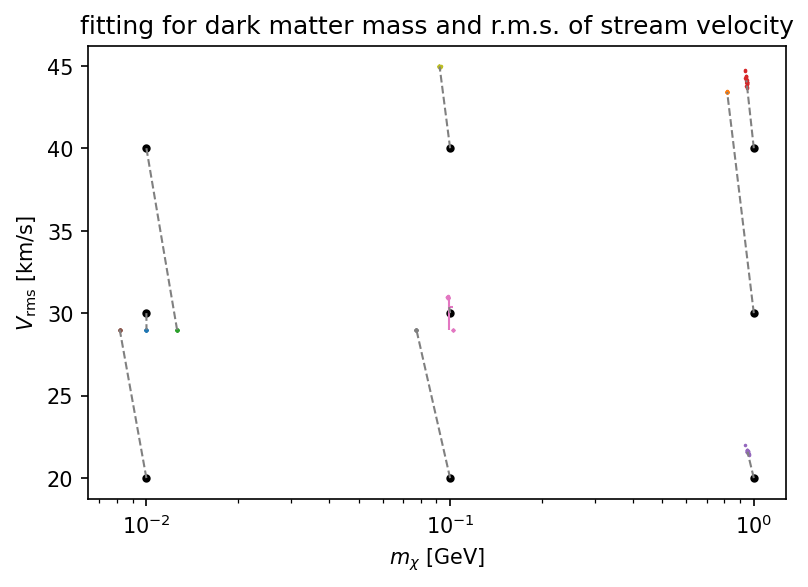

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.figure(dpi=150)
N_point = 0
for filename in os.listdir("."):
    if filename[-4:] == ".npy":
        data = np.load(filename, mmap_mode='r')
        m_chi_averaged = np.average(data.T[0])
        V_rms_averaged = np.average(data.T[1])
        m_chi_real = float(filename.split('-')[0][5:])
        V_rms_real = float(filename.split('-')[1][5:-4])
        # plt.scatter(data.T[0], data.T[1]/1000, s=1, label=r"N={}, $m_\chi$={}GeV, $Vrms$={}km/s".format(data.shape[0], m_chi_real, int(V_rms_real/1000)))
        print(f"{data.shape[0]} points; "+f"m,V=({m_chi_real}, {m_chi_averaged}), "+f"({int(V_rms_real)}, {V_rms_averaged:.2f})")
        plt.scatter(data.T[0], data.T[1]/1000, s=0.5)
        plt.scatter(m_chi_real, V_rms_real/1000, marker=".", c='k')
        # plt.scatter(m_chi_averaged, V_rms_averaged/1000, marker="v", c='g')
        xerr = np.percentile(data.T[0], [15.9,84.1])
        yerr = np.percentile(data.T[1], [15.9,84.1])
        xerr = abs(xerr-m_chi_averaged)
        yerr = abs(yerr-V_rms_averaged)
        # xerr = np.std(data.T[0])
        # yerr = np.std(data.T[1])
        # print("xerr =", xerr, "yerr =", yerr)
        plt.errorbar(m_chi_averaged, V_rms_averaged/1000, xerr=np.array([xerr]).T, yerr=np.array([yerr]).T/1000, linewidth=1)
        plt.plot([m_chi_real, m_chi_averaged], [V_rms_real/1000, V_rms_averaged/1000], linewidth=1, linestyle='--', c='grey')
        N_point += 1
# plt.colorbar()
# plt.xlim(0, 0.15)
# plt.ylim(20,35)
plt.title("fitting for dark matter mass and r.m.s. of stream velocity")
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(r"$V_{\rm rms}$ [km/s]")
# plt.legend()
plt.savefig(f"10Vrms-diff_step1.png")
plt.show()

In [5]:
def compare(m_list, v_list):
    plt.figure(dpi=150)
    for m_chi in m_list:
        for V_rms in v_list:
            z, dTb, m, V = average_dTb(m_chi=m_chi, V_rms=V_rms, more_random_v_streams=200, cores=1, verbose=False)
            # print('dTb =', dTb)
            plt.plot(z, dTb, label=f"{m} GeV, {V} m/s")
    # plt.xlim(0,300)
    # plt.ylim()
    plt.legend()
    plt.show()

1 CPU working...
It costs 0.19 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.19 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.18 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.18 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


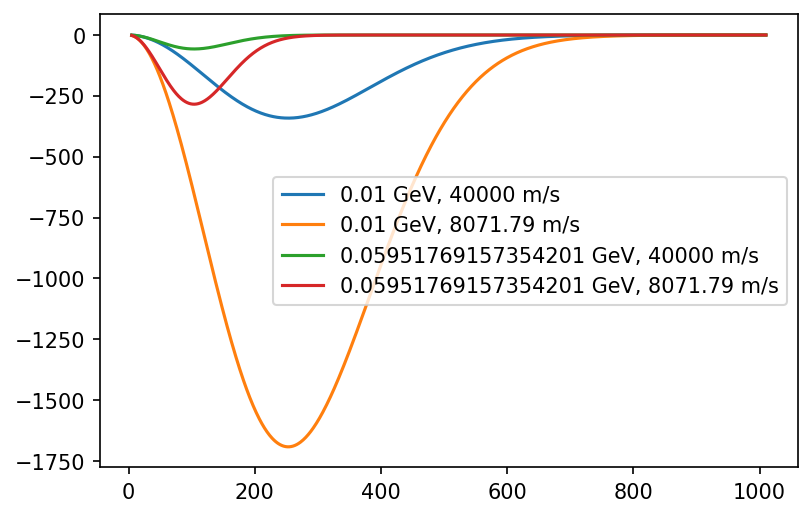

In [8]:
compare((0.01, 0.05951769157354201), (40000, 8071.79))

In [9]:
!pwd
!rm -r average_dTb*/
!rm m_chi*.npy
!rm ../slurm*.out

/storage/scratch1/3/bxia34/ares
rm: cannot remove ‘../slurm*.out’: No such file or directory
